In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to [0, 1] range by dividing by 255
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to add a channel dimension (for grayscale images)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# One-hot encode the labels for loss function
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [3]:
def display_image(dataset, index):
    plt.matshow(dataset[index])

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

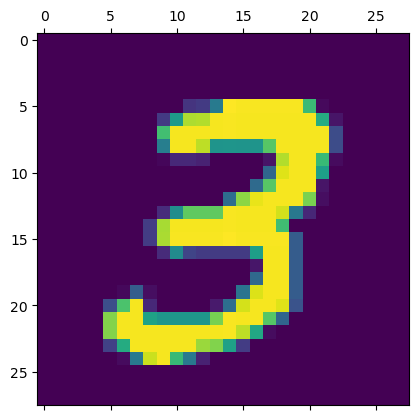

In [4]:
display_image(train_images, 7)
train_labels[7]

In [5]:
train_images.shape

(60000, 28, 28, 1)

In [6]:
model = models.Sequential([ # Sequential = linear stack of layers where each layer's output is passed as input to the next layer
    # 32 filters = 32 matrices each used to detect an edge or feature
    # 3x3 is the size of each filter, stride = the # of pixels by which the filter moves over the input data
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 3 dimensions is standard
    layers.MaxPooling2D((2, 2)), # the # of filters increases in order to capture the combination of simpler features into more complex patterns
    layers.Conv2D(64, (3, 3), activation='relu'), # 32 and 64 are typical for filters because they strike a good balance between model capacity and computational efficiency
    layers.MaxPooling2D((2, 2)), # 
    layers.Conv2D(64, (3, 3), activation='relu'), # I don't understand what 'relu' is
    layers.Flatten(), # must flatten because dense layers expect a one dimensional input
    layers.Dense(64, activation='relu'), # Dense layers are where the network learns to combine the abstracted features into a meaningful prediction
    layers.Dense(10, activation='softmax') # The final dense layer has 10 units, corresponding to the 10 possible output classes
]) # set KMP_DUPLICATE_LIB_OK=TRUE

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels)) # Mini-Batch Gradient Descent

Epoch 1/20
938/938 [==============================] - 18s 18ms/step - loss: 0.1911 - accuracy: 0.9399 - val_loss: 0.0617 - val_accuracy: 0.9812
Epoch 2/20
938/938 [==============================] - 19s 21ms/step - loss: 0.0511 - accuracy: 0.9847 - val_loss: 0.0338 - val_accuracy: 0.9894
Epoch 3/20
938/938 [==============================] - 20s 21ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0338 - val_accuracy: 0.9891
Epoch 4/20
938/938 [==============================] - 20s 21ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0319 - val_accuracy: 0.9899
Epoch 5/20
938/938 [==============================] - 20s 21ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0261 - val_accuracy: 0.9917
Epoch 6/20
938/938 [==============================] - 20s 22ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0284 - val_accuracy: 0.9919
Epoch 7/20
938/938 [==============================] - 20s 22ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0304 - val_accuracy:

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0317 - accuracy: 0.9934
Test accuracy: 0.993399977684021


In [10]:
predictions = model.predict(test_images) # an array of probabilities for each class, predict expects a batch of data or images

313/313 [==============================] - 2s 6ms/step


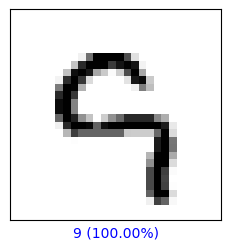

In [14]:
def show_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({100*np.max(predictions_array):.2f}%)", color=color)

i = 104
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
show_image(i, predictions, test_labels, test_images)
plt.show()

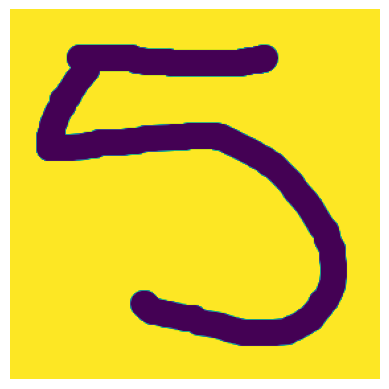

In [15]:
my_image = Image.open("C:/Users/HP/Desktop/MNIST/mnist_project/output_image.png").convert("L")

plt.imshow(my_image);
plt.axis('off')  # Hide the axes
plt.show()

In [16]:
my_image = my_image.resize((28, 28))  # Resize to 28x28
img_array = np.array(my_image) / 255.0  # Normalize pixel values
img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for the neural network

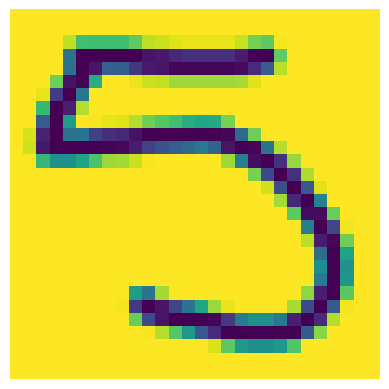

(1, 28, 28, 1)

In [17]:
plt.imshow(my_image);
plt.axis('off')  # Hide the axes
plt.show()

img_array.shape

In [18]:
my_predictions = model.predict(img_array)
squeezed_predictions = np.squeeze(my_predictions, axis=0)

1/1 [==============================] - 0s 22ms/step


In [19]:
print(f'Predicted Digit: {np.argmax(my_predictions)}')
print('Confidence Per Digit: ' + str({i: squeezed_predictions[i] for i in range(0,10)}))

Predicted Digit: 5
Confidence Per Digit: {0: 6.916292e-06, 1: 0.0015645407, 2: 0.023388363, 3: 0.07225964, 4: 3.6739976e-07, 5: 0.8092079, 6: 0.019578952, 7: 9.235906e-06, 8: 0.07239059, 9: 0.0015934065}


In [20]:
model.save('my_cnn_model.h5')